In [75]:
import os
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Import Dataset

train_dataset = h5py.File('../Datasets/TrainCatsVsNoncats.h5', "r")
train_dataset_X = np.array(train_dataset["train_set_x"][:])
train_dataset_y = np.array(train_dataset["train_set_y"][:]).reshape(-1, 1)

test_dataset = h5py.File('../Datasets/TestCatsVsNoncats.h5', "r")
test_dataset_X = np.array(test_dataset["test_set_x"][:])
test_dataset_y = np.array(test_dataset["test_set_y"][:]).reshape(-1, 1)

In [19]:
print(f"Number of Training examples : {train_dataset_X.shape[0]}")
print(f"Number of Test examples : {test_dataset_X.shape[0]}")
print(f"Dimensions of Images : {train_dataset_X.shape[1:4]}")
print(f"Dimensions of Labels : {train_dataset_y.shape[1]}")

Number of Training examples : 209
Number of Test examples : 50
Dimensions of Images : (64, 64, 3)
Dimensions of Labels : 1


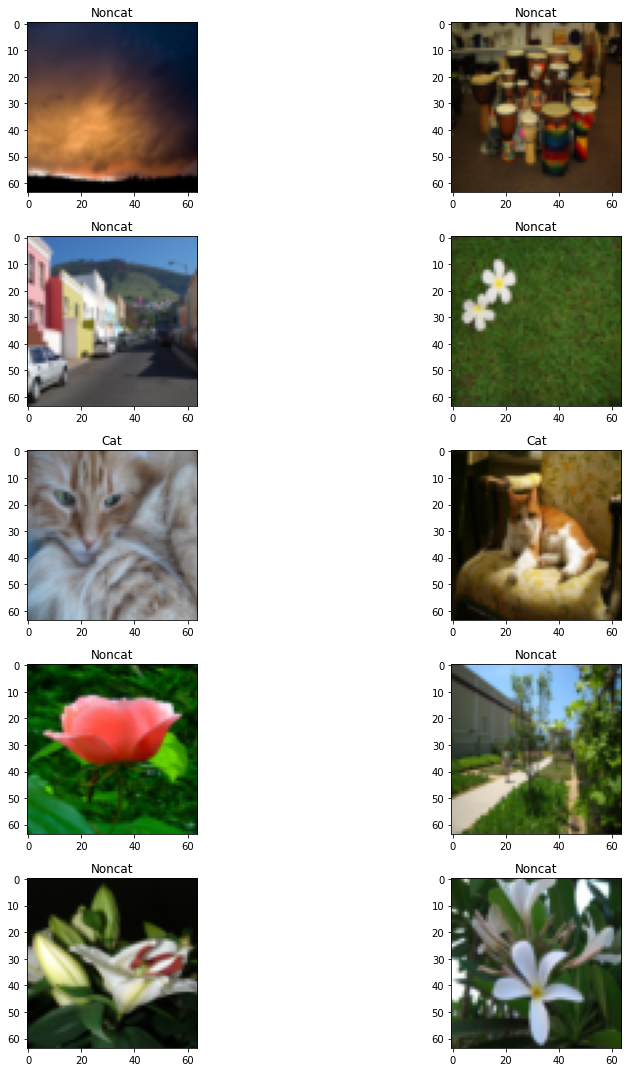

In [52]:
# Example Images
fig, axs = plt.subplots(5, 2, figsize = (15, 15))

for i in range(5):
    for j in range (2):
        axs[i, j].imshow(train_dataset_X[5 * j + i])
        axs[i, j].set_title(['Cat' if train_dataset_y[5 * j + i] == 1 else 'Noncat'][0])
        
plt.tight_layout()

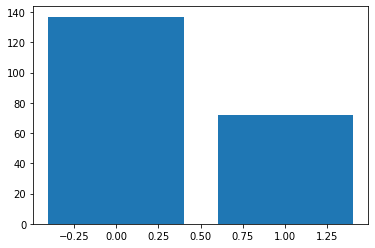

In [71]:
# Checking Distribution of Train Dataset
val, freq = np.unique(train_dataset_y, return_counts = True)
plt.bar(val, freq);

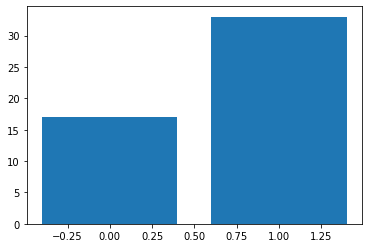

In [73]:
# Checking Distribution of Test Dataset
val, freq = np.unique(test_dataset_y, return_counts = True)
plt.bar(val, freq);

In [83]:
# After Data Augmentation 
# Make sure the neccesary scripts are run in order to run this cell correctly. 
# (Explaied in README)

train_cat_dir = "../Datasets/TrainImages/Cats/"
train_cat_count = len(glob.glob(os.path.join(train_cat_dir, '*')))
train_noncat_dir = "../Datasets/TrainImages/Noncats/"
train_noncat_count = len(glob.glob(os.path.join(train_noncat_dir, '*')))
test_cat_dir = "../Datasets/TestImages/Cats/"
test_cat_count = len(glob.glob(os.path.join(test_cat_dir, '*')))
test_noncat_dir = "../Datasets/TestImages/Noncats/"
test_noncat_count = len(glob.glob(os.path.join(test_noncat_dir, '*')))
print(f"Number of Training examples : {train_cat_count + train_noncat_count}")

Number of Training examples : 6477


Overall the dataset is biased towards noncats. However normalizing this did not have much effect on the test accuracy of the models trained.